# I. Lý thuyết

1) Mạng tích chập CNN sẽ được thực hiện như thế nào?

A. Phân chia feature map thành các ma trận theo chiều channel và thực hiện tích chập giữa mỗi ma trận kernel với từng chiều.

B. Thực hiện phép nhân ma trận kernel với chuyển vị của ma trận local receptive field để thu được giá trị feature map output.

C. Tính trung bình các phân tử trên một ma trận local receptive field.

D. Di chuyển vùng local receptive field theo chiều từ trái sang phải và từ trên xuống dưới và nhân tích chập với kernel để thu được ma trận feature map.

Chọn D.

2) Thực hiện phép nhân tích chập giữa ma trận đầu vào kích thước width và height lần lượt là $(W, H)$ với bộ lọc kích thước $(F, F)$ và bước nhảy $S$ thì thu được ma trận đầu ra với kích thước width và height $(W', H')$ là bao nhiêu? Hãy lựa chọn công thức tổng quát nhất.

A. $W' =⌊ \frac{W-F}{S} ⌋ + 1;~ H' =⌊ \frac{H-F}{S} ⌋ + 1$

B. $W' =\lceil \frac{W-F}{S} \rceil + 1;~ H' = \lceil \frac{H-F}{S} \rceil + 1$ 

C. $W' =\lfloor \frac{W-F+2P}{S} \rfloor + 1;~ H' = \lfloor \frac{H-F+2P}{S} \rfloor + 1$ với $P$ là số lượng các véc tơ 0 padding ở bên ngoài đều hai phía.

D. $W' =\lceil \frac{W-F+P}{S} \rceil + 1;~ H' = \lceil \frac{H-F+P}{S} \rceil + 1$ với $P$ là số lượng các véc tơ 0 padding ở bên ngoài đều hai phía.

Chọn A.

3) Mạng CNN sẽ học được những gì qua các layers?

A. Tại những layers đầu mỗi channels sẽ giúp phân biệt một loại đặc trưng, của vật thể. Những đặc trưng này sau đó được trải phẳng và đưa vào mạng MLP để phân loại vật thể.

B. Những layers cuối cùng sẽ zoom vào từng chi tiết của vật thể để phân loại vật thể.

C. Tại những layers đầu mạng sẽ học được các đặc trưng chung như các edge dọc, ngang, chéo,.... Các đặc trưng chi tiết và tổng quát giúp nhận diện vật thể được học tại những layers cuối cùng.

D. Các layers đầu tiên sẽ tập trung vào các chi tiết bộ phận của vật thể.

Chọn C

4) Kiến trúc chung của một mạng CNN là gì?

A. _[Conv -> BatchNorm -> Activation -> Maxpooling] x n_

B. _[BatchNorm -> Conv -> Activation -> Maxpooling] x n_ 

C. _[Conv -> BatchNorm -> Maxpooling -> Activation -> Maxpooling] x n_ 

D. _[Conv -> BatchNorm -> Maxpooling -> Activation -> Maxpooling] x n -> Flatten -> [FullyConnected -> Activation] x m -> Softmax_ 

Chọn A.

5) Thông thường đặc điểm kích thước feature map của mạng neural sẽ như thế nào ?

A. Kích thước feature map tăng dần gấp đôi qua thời gian.

B. Kích thước feature map sẽ duy trì không đổi qua thời gian.

C. Kích thước mạng sẽ giảm dần gấp đôi sau mỗi một lần downsampling và sau đó tăng dần gấp đôi sau mỗi lần upsampling để khôi phục về kích thước ảnh input.

D. Kích thước mạng thường giảm gấp đôi sau một lần downsampling và số lượng các filters tăng dần.

Chọn D.

In [ ]:
# DCCDD

# II. Thực hành





##6) Thực hiện xây dựng và huấn luyện một mạng CNN ngẫu nhiên trên bộ dữ liệu [Dog and Cat](https://www.kaggle.com/c/dog-vs-cat-classification/data). Lưu ý cần thực hiện [chuẩn hóa dữ liệu](https://github.com/pytorch/examples/issues/112) đối với bộ dữ liệu ImageNet trước khi huấn luyện.

In [ ]:
%cd /content/drive/MyDrive/AI/Deeplearning_course/Week 5

/content/drive/MyDrive/AI/Deeplearning_course/Week 5


In [ ]:
!ls

5.CNN_HomeWork.ipynb  model_1.pt  model_4.pt  model_7.pt
data		      model_2.pt  model_5.pt  model_8.pt
model_0.pt	      model_3.pt  model_6.pt  model_9.pt


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision.datasets import ImageFolder
import torch.optim as optim
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "./data/train/train"
test_data_path = "./data/test/test"

###6.1)Show data

In [ ]:
data_transforms = transforms.Compose([
                                      transforms.Resize((100, 100)),
                                      transforms.ToTensor(),
])

In [ ]:
data = ImageFolder(data_path,transform = data_transforms)

In [ ]:
len(data)

25000

In [ ]:
data_class = ["cat","dog"]

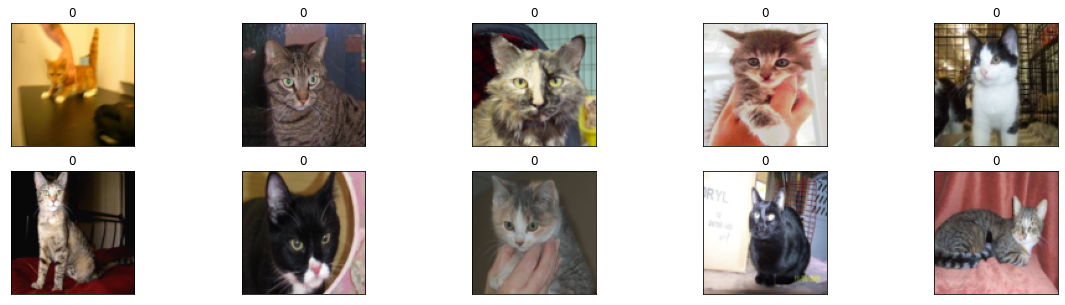

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  img, label = data[i]
  #Mathplot lib needs 3 in third dimenstion=>convert dimension
  t = img.permute(1,2,0)
  plt.imshow(t)
  plt.title(label)
  plt.xticks([])
  plt.yticks([])
  

###6.2)Build CNN model to train data

In [ ]:
mean = [0.485, 0.456, 0.406]
std  = [0.229, 0.224, 0.225]
data_transforms = transforms.Compose([
                                      transforms.Resize((128, 128)),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean,std)
])

In [ ]:
data = ImageFolder(data_path,transform = data_transforms)

In [ ]:
train_size = int(0.8 * len(data))
test_size = len(data) - train_size

In [ ]:
train_dataset, val_dataset = random_split(data,[train_size,test_size])

In [ ]:
len(train_dataset)

20000

In [ ]:
len(val_dataset)

5000

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle = True)
val_loader = DataLoader(val_dataset,batch_size=64,shuffle=True)

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.con1 = nn.Conv2d(in_channels=3,out_channels=64,kernel_size=3,padding=1)
    self.con2 = nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3,padding=1)
    self.con3 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,padding=1)
    self.con4 = nn.Conv2d(in_channels=128,out_channels=128,kernel_size=3,padding=1)


    self.maxpool = nn.MaxPool2d(kernel_size=2,stride=2)

    self.fc1 = nn.Linear(8192,512) # 128*8*8 = 32768
    self.fc2 = nn.Linear(512,128)
    self.fc3 = nn.Linear(128,2)

  def forward(self,x):
    x = F.relu(self.con1(x))
    x = self.maxpool(x)

    x = F.relu(self.con2(x))
    x = self.maxpool(x)

    x = F.relu(self.con3(x))
    x = self.maxpool(x)

    x = F.relu(self.con4(x))
    x = self.maxpool(x)

    # x = x.view(-1,128*16*16)
    x = x.reshape(x.shape[0], -1)

    x = F.relu(self.fc1(x))
    x = F.dropout(x,0.2)
    
    x = F.relu(self.fc2(x))
    x = F.dropout(x,0.2)
    x = self.fc3(x)

    x = F.softmax(x)
    return x

In [ ]:
device = "cpu"
if (torch.cuda.is_available()):
    device = "cuda:0"
print('Training on', device)

Training on cuda:0


In [ ]:
model = Net()
model = model.to(device=device)
optimizer = optim.SGD(model.parameters(),lr = 3e-2)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
model = model.to(device=device)

In [ ]:
print(model)

Net(
  (con1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (con2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (con3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (con4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=8192, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=2, bias=True)
)


In [ ]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, val_loader):
  train_losses = []
  val_losses = []
  val_accuracy = []
  epoch_enumerate = []
  for epoch in range(1,n_epochs + 1):
    loss_train = 0.0
    epoch_enumerate.append(epoch)

    for imgs, labels in train_loader:
      imgs = imgs.to(device)
      labels = labels.to(device)

      outputs = model(imgs)
      # print(outputs.shape)
      loss = loss_fn(outputs,labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      loss_train += loss.item()
    average_train_loss = loss_train/len(train_loader)
    train_losses.append(average_train_loss)

    correct = 0
    with torch.no_grad():
      loss_val = 0.0
      for data in val_loader:
        images, labels = data

        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = loss_fn(outputs,labels)
        loss_val += loss.item()

        _, predicted = torch.max(outputs,1)
        d = (predicted == labels)
        correct += d.sum()
      average_val_loss = loss_val/len(val_loader)
      val_losses.append(average_val_loss)

    accuracy = correct / len(val_dataset)
    val_accuracy.append(accuracy.cpu())

    if epoch == 1 or epoch % 1 == 0:
      print('Epoch {}, Average training loss {}, Val accuracy {}'.format(epoch,loss_train/len(train_loader), accuracy))
  return (epoch_enumerate,train_losses,val_losses,val_accuracy)

In [ ]:
epoch_enumerate, train_losses,val_losses,val_accuracy = training_loop(n_epochs = 10, optimizer = optimizer, model = model, loss_fn = loss_fn, train_loader = train_loader, val_loader = val_loader)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 1, Average training loss 0.5421176185242285, Val accuracy 0.7687999606132507
Epoch 2, Average training loss 0.5316001178738409, Val accuracy 0.7549999952316284
Epoch 3, Average training loss 0.5208944861119548, Val accuracy 0.7741999626159668
Epoch 4, Average training loss 0.51099889089886, Val accuracy 0.7865999937057495
Epoch 5, Average training loss 0.5049334148438974, Val accuracy 0.795199990272522
Epoch 6, Average training loss 0.4967236301769464, Val accuracy 0.8021999597549438
Epoch 7, Average training loss 0.48823397428082965, Val accuracy 0.7605999708175659
Epoch 8, Average training loss 0.4797296513574192, Val accuracy 0.8163999915122986
Epoch 9, Average training loss 0.4744535213270888, Val accuracy 0.7979999780654907
Epoch 10, Average training loss 0.46844128383615147, Val accuracy 0.8193999528884888


Text(0, 0.5, 'Training loss')

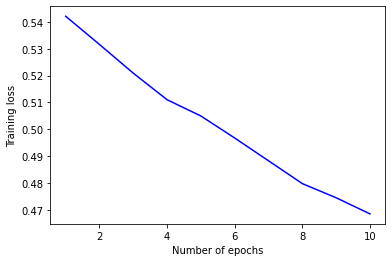

In [ ]:
plt.plot(epoch_enumerate,train_losses,color='blue')
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")

Text(0, 0.5, 'Training loss')

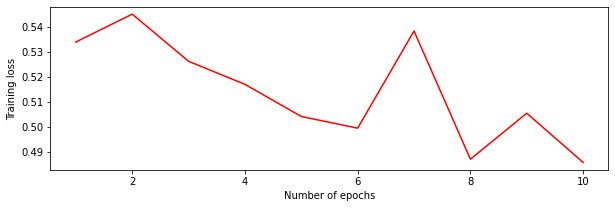

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(epoch_enumerate,val_losses,color='red')
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")

Text(0, 0.5, 'Accuracy')

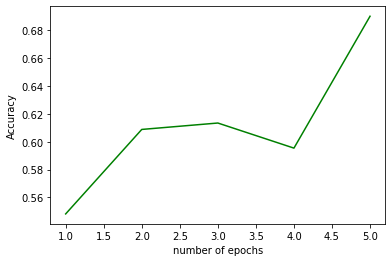

In [ ]:
plt.plot(epoch_enumerate,val_accuracy,color='green')
plt.xlabel("number of epochs")
plt.ylabel("Accuracy")

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
truelabels = []
predictions = []
for data, target in val_loader:
  for label in target.cpu().data.numpy():
    truelabels.append(label)
  for prediction in model.cpu()(data).data.numpy().argmax(1):
    predictions.append(prediction)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
cm = confusion_matrix(truelabels,predictions)
cm

array([[1897,  631],
       [ 284, 2188]])

In [ ]:
cm.sum()

5000

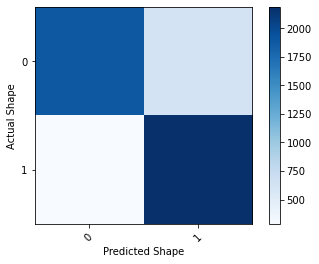

In [ ]:
classes = [0,1]
import numpy as np
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()

##7) Grid Search kiến trúc CNN dựa trên việc tổng quát hóa một thiết kế câu 6.

##8) Huấn luyện lại mô hình bằng kiến trúc ResNet và MobileNet. Đánh giá chi phí tính toán và submit kết quả độ chính xác trên các ảnh thuộc folder test.

###8.1.1) Resnet train

In [ ]:
from torchvision import models

In [ ]:
dir(models)

['AlexNet',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'regnet',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 're

In [ ]:
resnet = models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
transform = transforms.Compose([  
 transforms.Resize((256,256)),
 transforms.CenterCrop(224),
 transforms.ToTensor(),
 transforms.Normalize(
 mean=[0.485, 0.456, 0.406],
 std=[0.229, 0.224, 0.225]
 )])

In [ ]:
from PIL import Image
img = Image.open("./data/train/train/cats/cat.10.jpg")

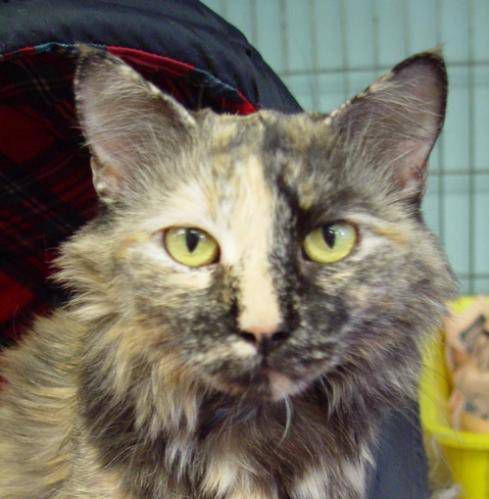

In [ ]:
img

In [ ]:
img_t = transform(img)
batch_t = torch.unsqueeze(img_t,0)

In [ ]:
#215, Brittany_spaniel : dog
#227, kelpie : dog
#281, 281, tabby: cat

In [ ]:
resnet.eval()
out = resnet(batch_t)

In [ ]:
out.argmax()

tensor(281)

In [ ]:
from PIL import Image
img_dog = Image.open("./data/train/train/dogs/dog.21.jpg")

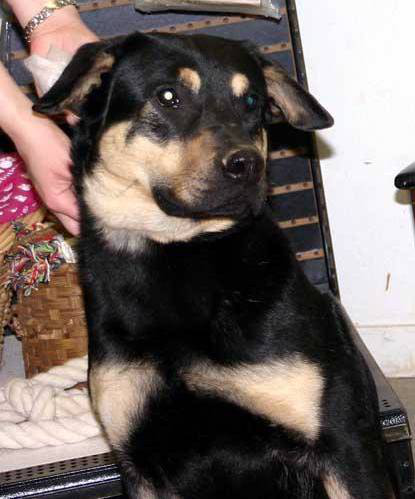

In [ ]:
img_dog

In [ ]:
img_dog_trans = transform(img_dog)
batch_t = torch.unsqueeze(img_dog_trans,0)

In [ ]:
resnet.eval()
out = resnet(batch_t)

In [ ]:
out.argmax()

tensor(227)

In [ ]:
# Load pretrained ResNet50 Model
resnet50 = models.resnet50(pretrained=True)

In [ ]:
# Freeze layers 1-6 in total 10 layers of Resnet50
ct = 0
for child in resnet50.children():
  ct += 1
  if ct < 7:
      for param in child.parameters():
          param.requires_grad = False

In [ ]:
fc_inputs = resnet50.fc.in_features
resnet50.fc = nn.Sequential(
    nn.Linear(fc_inputs, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, 2), # Since 100 possible outputs
    nn.LogSoftmax(dim=1) # For using NLLLoss()
)

In [ ]:
resnet50 = resnet50.to(device)

In [ ]:
import time
from torchsummary import summary

In [ ]:
loss_func = nn.NLLLoss()
val_size = test_size

In [ ]:
def train_and_validate(model, loss_criterion, optimizer, scheduler,epochs=25):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)
  
    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''
    
    start = time.time()
    history = []
    best_loss = 100000.0
    best_epoch = None

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        
        # Set to training mode
        model.train()
        
        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for i, (inputs, labels) in enumerate(train_loader):

            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Clean existing gradients
            optimizer.zero_grad()
            
            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)
            
            # Compute loss
            loss = loss_criterion(outputs, labels)
            
            # Backpropagate the gradients
            loss.backward()
            
            # Update the parameters
            optimizer.step()
            scheduler.step()
            
            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)
            
            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            
            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            
            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)
            
            #print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))

        
        # Validation - No gradient tracking needed
        with torch.no_grad():

            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(val_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)
                if not j%100:
                  print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
        if valid_loss < best_loss:
            best_loss = valid_loss
            best_epoch = epoch

        # Find average training loss and training accuracy
        avg_train_loss = train_loss/train_size 
        avg_train_acc = train_acc/train_size

        # Find average training loss and training accuracy
        avg_valid_loss = valid_loss/val_size 
        avg_valid_acc = valid_acc/val_size

        history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])
                
        epoch_end = time.time()
    
        print("Epoch : {:03d}, Training: Loss - {:.4f}, Accuracy - {:.4f}%, \n\t\tValidation : Loss - {:.4f}, Accuracy - {:.4f}%, Time: {:.4f}s".format(epoch+1, avg_train_loss, avg_train_acc*100, avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start))
        
        # Save if the model has best accuracy till now
        torch.save(model, 'model_'+str(epoch)+'.pt')
            
    return model, history, best_epoch

In [ ]:
num_epochs = 10
optimizer = optim.Adam(resnet50.parameters(), lr=0.005)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10,20], gamma=0.1)
trained_model, history, best_epoch = train_and_validate(resnet50, loss_func, optimizer, scheduler, num_epochs)

Epoch: 1/10
Validation Batch number: 000, Validation: Loss: 0.3481, Accuracy: 0.8438
Epoch : 001, Training: Loss - 0.4698, Accuracy - 78.0950%, 
		Validation : Loss - 0.2810, Accuracy - 88.8200%, Time: 184.3952s
Epoch: 2/10
Validation Batch number: 000, Validation: Loss: 0.1647, Accuracy: 0.9375
Epoch : 002, Training: Loss - 0.2264, Accuracy - 91.4600%, 
		Validation : Loss - 0.1648, Accuracy - 93.4800%, Time: 181.1221s
Epoch: 3/10
Validation Batch number: 000, Validation: Loss: 0.1784, Accuracy: 0.9531
Epoch : 003, Training: Loss - 0.1526, Accuracy - 94.2050%, 
		Validation : Loss - 0.1421, Accuracy - 94.4600%, Time: 178.6183s
Epoch: 4/10
Validation Batch number: 000, Validation: Loss: 0.1574, Accuracy: 0.9062
Epoch : 004, Training: Loss - 0.1133, Accuracy - 95.8350%, 
		Validation : Loss - 0.1264, Accuracy - 95.0200%, Time: 177.2972s
Epoch: 5/10
Validation Batch number: 000, Validation: Loss: 0.1246, Accuracy: 0.9688
Epoch : 005, Training: Loss - 0.0850, Accuracy - 96.8250%, 
		Valid

###8.1.2) Đánh giá mô hình train được trên folder test

In [ ]:
transform = transforms.Compose([  
 transforms.Resize((256,256)),
 transforms.CenterCrop(224),
 transforms.ToTensor(),
 transforms.Normalize(
 mean=[0.485, 0.456, 0.406],
 std=[0.229, 0.224, 0.225]
 )])

In [ ]:
!ls

5.CNN_HomeWork.ipynb  model_1.pt  model_4.pt  model_7.pt
data		      model_2.pt  model_5.pt  model_8.pt
model_0.pt	      model_3.pt  model_6.pt  model_9.pt


In [ ]:
resnet50 = torch.load("./model_9.pt",map_location ='cpu')

In [ ]:
from PIL import Image
img_dog = Image.open("./data/test/test/000002.jpg")

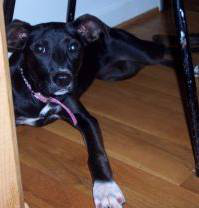

In [ ]:
img_dog

In [ ]:
img_dog_trans = transform(img_dog)
batch_t = torch.unsqueeze(img_dog_trans,0)

In [ ]:
resnet50.eval()
out = resnet50(batch_t)

In [ ]:
out.argmax()

tensor(1)

In [ ]:
import os
import pandas as pd
test_filenames = os.listdir("./data/test/test")
test_df = pd.DataFrame({
    'id': test_filenames
})

In [ ]:
test_df['id'][0]
test_folder = "./data/test/test/"

In [ ]:
labels = []
for name in test_df['id']:
  image_path = test_folder + name
  img = Image.open(image_path)
  img_trans = transform(img)
  batch_t = torch.unsqueeze(img_trans,0)
  resnet50.eval()
  out = resnet50(batch_t)
  labels.append(out.argmax().numpy().item())



In [ ]:
test_df['labels'] = labels

In [ ]:
test_df = test_df.sort_values(by='id')
test_df.to_csv('submission.csv', index=False)

In [ ]:
test_df.head(10)

,id,labels
7026,000000.jpg,0
7046,000001.jpg,1
7013,000002.jpg,1
7015,000003.jpg,0
7011,000004.jpg,1
7047,000005.jpg,0
7006,000006.jpg,0
7019,000007.jpg,0
7003,000008.jpg,0
7044,000009.jpg,0


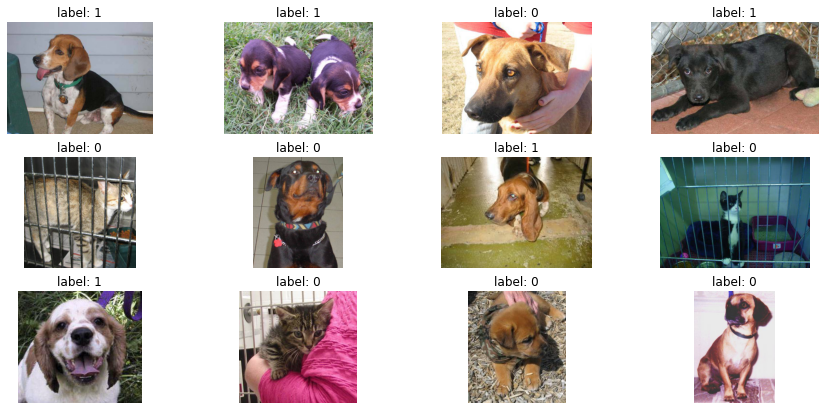

In [ ]:
label_names = {0:'cat',1:'dog'}
fig, ax = plt.subplots(figsize=(15,7))
i = 0 
for index, row in test_df.sample(12).iterrows():
  i+=1
  plt.subplot(3,4,i)
  img = plt.imread(test_folder + row['id'])
  plt.imshow(img)
  plt.axis('off')
  plt.title("label: " + str(row['labels']))
plt.show()

Submit được có 87%. sao sai nhiều phết nhở. 

##9) Thử nghiệm các phương pháp Augmentation như Flip, Rotation, Random Crop, Bright Contrast để cải thiện kết quả mô hình.

In [ ]:
# Applying Transforms to the Data
train_transform = transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

test_transform = transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

##10) Lập bảng kết quả các thử nghiệm đã sử dụng.